# Importing Libraries

In [2]:
import pandas as pd
df=pd.read_csv('covid_dataset.csv')
print(df.isnull().sum())
print(df.shape)

country         0
continent       0
date            0
age             0
total_cases    45
deaths         45
recoveries     45
dtype: int64
(1500, 7)


# Filling Null Values with Median

In [4]:
numeric_cols=["total_cases","deaths","recoveries"]
for col in numeric_cols:
    median_values=df[col].median()
    df[col]=df[col].fillna(median_values)
print("Null values after filling:")
print(df.isnull().sum())

Null values after filling:
country        0
continent      0
date           0
age            0
total_cases    0
deaths         0
recoveries     0
dtype: int64


# Value count 

In [5]:
country_counts=df["country"].value_counts()
print(country_counts)

country
USA             87
Japan           84
Spain           83
Italy           82
Turkey          79
South Korea     79
India           79
Saudi Arabia    77
France          76
Germany         75
UK              75
Brazil          74
Australia       74
South Africa    73
Canada          71
Mexico          71
Indonesia       70
Russia          66
Argentina       65
China           60
Name: count, dtype: int64


# tot cases exceeds 1000000

In [6]:
print("Total number of cases exceeds 1,000,000")
df_filtered = df[df['total_cases'] > 1000000]
print(df_filtered)

Total number of cases exceeds 1,000,000
           country      continent                           date  age  \
2           France         Europe  2020-01-01 23:22:32.101400933   21   
9        Argentina  South America  2020-01-05 09:11:24.456304202   76   
12          Canada  North America  2020-01-06 20:15:12.608405603   43   
14     South Korea           Asia  2020-01-07 19:37:44.709806537   67   
20             USA  North America  2020-01-10 17:45:21.014009339   65   
...            ...            ...                            ...  ...   
1486           USA  North America  2021-12-24 16:03:31.340893928   67   
1492         Spain         Europe  2021-12-27 14:11:07.645096728   58   
1497  Saudi Arabia           Asia  2021-12-30 00:37:27.898599064   67   
1498         India           Asia  2021-12-30 12:18:43.949299528   64   
1499            UK         Europe  2021-12-31 00:00:00.000000000   67   

      total_cases   deaths  recoveries  
2       1620001.0  12195.0    620876.0  
9

# Remove unwanted Record

In [6]:
print("Increase 'total_cases' column by 10%")
df = df[df['deaths'] >= 10]
print(df)


Increase 'total_cases' column by 10%
           country      continent                           date  age  \
0           Canada  North America  2020-01-01 00:00:00.000000000   51   
1            India           Asia  2020-01-01 11:41:16.050700466   37   
2           France         Europe  2020-01-01 23:22:32.101400933   21   
3           Brazil  South America  2020-01-02 11:03:48.152101400   26   
4      South Korea           Asia  2020-01-02 22:45:04.202801867   27   
...            ...            ...                            ...  ...   
1495         Japan           Asia  2021-12-29 01:14:55.797198128   49   
1496        France         Europe  2021-12-29 12:56:11.847898600   77   
1497  Saudi Arabia           Asia  2021-12-30 00:37:27.898599064   67   
1498         India           Asia  2021-12-30 12:18:43.949299528   64   
1499            UK         Europe  2021-12-31 00:00:00.000000000   67   

      total_cases   deaths  recoveries  
0        272220.0  41843.0    765481.0  
1   

# apply fun on col

In [7]:
print("Increase all the values in the 'total_cases' column by 10%")
df['total_cases'] = df['total_cases'] * 1.10
print(df['total_cases'])

Increase all the values in the 'total_cases' column by 10%
0        299442.0
1        871406.8
2       1782001.1
3       1026040.4
4       1006281.1
          ...    
1495    1092473.8
1496     112357.3
1497    1591849.6
1498    1833216.0
1499    1810635.2
Name: total_cases, Length: 1500, dtype: float64


# Mean for Each continent

In [8]:
print("Mean number of cases for each continent")
mean_cases = df.groupby('continent')['total_cases'].mean()
print(mean_cases)

Mean number of cases for each continent
continent
Africa           1.183301e+06
Asia             1.055449e+06
Europe           1.096363e+06
North America    1.096122e+06
Oceania          1.020954e+06
South America    1.117387e+06
Name: total_cases, dtype: float64


# date range

In [9]:
print("Filter record from '2020-01-01' to '2020-12-31'")
start_date="2020-01-01 00:00:00.000000000"
end_date="2020-12-31 17:31:54.076050700"
df['date'] = pd.to_datetime(df['date'],
format="%Y-%d-%m %H:%M:%S.%f",errors='coerce')
Filtered_Data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
print(Filtered_Data)

Filter record from '2020-01-01' to '2020-12-31'
          country      continent                          date  age  \
0          Canada  North America 2020-01-01 00:00:00.000000000   51   
1           India           Asia 2020-01-01 11:41:16.050700466   37   
2          France         Europe 2020-01-01 23:22:32.101400933   21   
3          Brazil  South America 2020-02-01 11:03:48.152101400   26   
4     South Korea           Asia 2020-02-01 22:45:04.202801867   27   
..            ...            ...                           ...  ...   
708            UK         Europe 2020-10-12 18:57:23.895930620   51   
709     Indonesia           Asia 2020-11-12 06:38:39.946631088   64   
710  South Africa         Africa 2020-11-12 18:19:55.997331552   41   
711   South Korea           Asia 2020-12-12 06:01:12.048032020   70   
712        France         Europe 2020-12-12 17:42:28.098732488   44   

     total_cases   deaths  recoveries  
0       299442.0  41843.0    765481.0  
1       871406.8   

# death rate

In [10]:
print("Calculate death rate for each country")
df['death_rate'] = df['deaths'] / df['total_cases']
death_rate_country = df.groupby('country')['death_rate'].mean()
print(death_rate_country)

Calculate death rate for each country
country
Argentina       0.244508
Australia       0.061993
Brazil          0.046054
Canada          0.080547
China           0.056214
France          0.061700
Germany         0.069540
India           0.050577
Indonesia       0.192862
Italy           0.045506
Japan           0.157616
Mexico          0.097227
Russia          0.062447
Saudi Arabia    0.049660
South Africa    0.040977
South Korea     0.044031
Spain           0.049864
Turkey          0.119913
UK              0.055940
USA             0.055903
Name: death_rate, dtype: float64


# filter record based on age

In [11]:
print("People in the age group 60")
df_age60 = df[df['age'] == 60]
print(df_age60)

People in the age group 60
           country      continent                          date  age  \
17           Spain         Europe 2020-09-01 06:41:32.861907938   60   
35           Japan           Asia                           NaT   60   
68       Indonesia           Asia 2020-03-02 02:46:11.447631754   60   
93          Brazil  South America                           NaT   60   
96             USA  North America                           NaT   60   
147    South Korea           Asia 2020-12-03 14:06:19.452968646   60   
244      Indonesia           Asia                           NaT   60   
270             UK         Europe 2020-11-05 11:42:13.689126084   60   
275         Turkey           Asia                           NaT   60   
329          Italy         Europe 2020-09-06 05:17:00.680453636   60   
360        Germany         Europe                           NaT   60   
361         France         Europe                           NaT   60   
378      Argentina  South America 202

# visual

Visualizing Covid Data


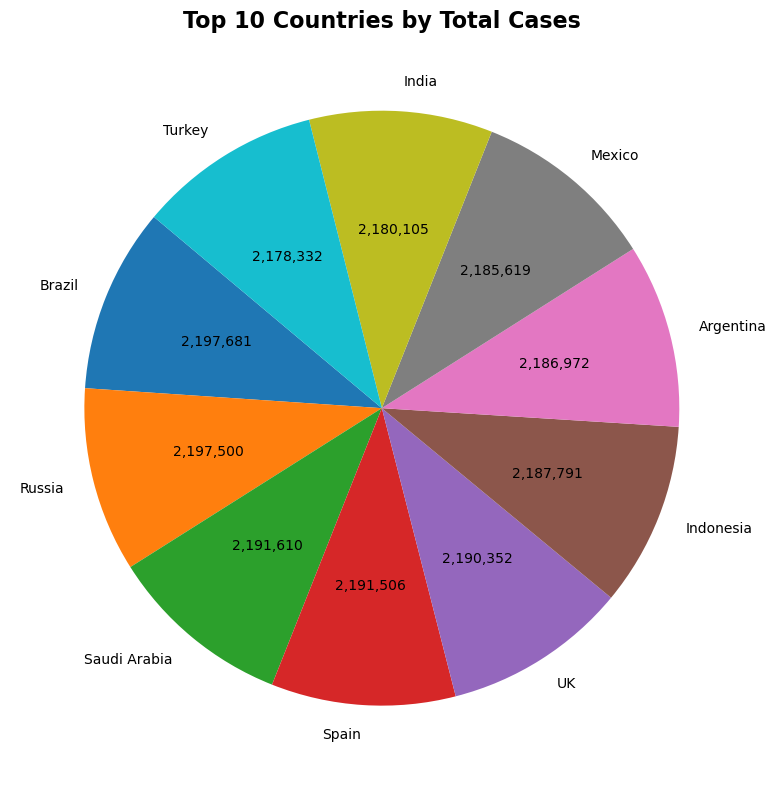

Graph Showed


In [12]:
print("Visualizing Covid Data")
import matplotlib.pyplot as plt

country_cases = df.groupby('country')['total_cases'].max()
top_countries = country_cases.nlargest(10)

plt.figure(figsize=(8,8))
plt.pie(top_countries,
        labels=top_countries.index,
        autopct=lambda p:f'{int(p*sum(top_countries)/100):,}',
        startangle=140,
        textprops={'fontsize':10}
        )
plt.title('Top 10 Countries by Total Cases',
          fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

print("Graph Showed")

# recovery rate

In [13]:
print("Recovery Rate")
df['recovery_rate'] = df['recoveries'] / df['total_cases']
recovery_rate_country = df.groupby('country')['recovery_rate'].mean()
print(recovery_rate_country)

Recovery Rate
country
Argentina       3.486335
Australia       2.391693
Brazil          2.340439
Canada          1.991646
China           1.647885
France          1.398014
Germany         1.716152
India           1.611567
Indonesia       4.562739
Italy           1.181097
Japan           5.121343
Mexico          5.870600
Russia          2.188026
Saudi Arabia    1.668761
South Africa    1.216737
South Korea     1.407277
Spain           2.111177
Turkey          3.665411
UK              1.535443
USA             1.740162
Name: recovery_rate, dtype: float64


# handle -ve values

In [14]:
print("Replace negative values in the 'total_cases'&'deaths'")
Total_Cases = df['total_cases'].clip(lower=0)
Deaths = df['deaths'].clip(lower=0)
print(Total_Cases)
print(Deaths)

Replace negative values in the 'total_cases'&'deaths'
0        299442.0
1        871406.8
2       1782001.1
3       1026040.4
4       1006281.1
          ...    
1495    1092473.8
1496     112357.3
1497    1591849.6
1498    1833216.0
1499    1810635.2
Name: total_cases, Length: 1500, dtype: float64
0       41843.0
1        3392.0
2       12195.0
3       28038.0
4       34570.0
         ...   
1495    22276.0
1496    49622.0
1497    26933.0
1498     9970.0
1499    12000.0
Name: deaths, Length: 1500, dtype: float64
